### Test data descriptive

In [ ]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa as lr
import os
from glob import glob
import IPython.display as ipd

In [ ]:
import seaborn as sns
import matplotlib

In [ ]:
sns.set_theme()
plt.rcParams["figure.figsize"] = (17, 5)

In [ ]:
import librosa.display

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## find path
os.listdir('/content/drive/MyDrive/Nube/DS4All - Cohort6 - Team 172/Code/data/ANH_RAIN_DATASET/audio')
file = '/content/drive/MyDrive/Nube/DS4All - Cohort6 - Team 172/Code/data/ANH_RAIN_DATASET/audio'

In [ ]:
# get arange of audio paths
audio_files = glob(file + '/*.wav')

In [ ]:
len(audio_files)

1104

In [ ]:
# read labels
df1=pd.read_csv("/content/drive/MyDrive/Nube/DS4All - Cohort6 - Team 172/Code/data/ANH_RAIN_DATASET/audio_labels.csv")

In [ ]:
# create dataframe with audio paths
dfn = pd.DataFrame(audio_files, columns=['path'])
dfn['audioname'] = dfn['path'].apply(lambda x: x[-8:])
dfn.head()

path audioname
0  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0235.wav
1  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0219.wav
2  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0233.wav
3  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0221.wav
4  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0220.wav

In [ ]:
df1.head(5)

fname   label      max_f  max_t      min_f  min_t  \
0  G001_20211112_030000.WAV  SENSAT  47297.562    5.0  47297.562    0.0   
1  G001_20211112_180000.WAV  MURCIE  44956.098    5.0  24819.512    0.0   
2  G001_20211112_183000.WAV  INSECT  51980.490    5.0   3721.417    0.0   
3  G001_20211112_203000.WAV  MURCIE  33482.926    5.0  16776.250    0.0   
4  G001_20211112_220000.WAV  SENSAT  24585.365    5.0  24585.365    0.0   

  sample_idx  
0   0000.wav  
1   0001.wav  
2   0002.wav  
3   0003.wav  
4   0004.wav

In [ ]:
df1.tail(5)

fname   label      max_f  max_t     min_f     min_t  \
1099  G100_20211111_073000.WAV  AVEVOC   5520.767   10.0   843.450  1.185324   
1100  G100_20211116_180000.WAV  TRAMOT    766.773   10.0     0.000  0.000000   
1101  G100_20211121_070000.WAV  LLUVIA  49073.482   10.0     0.000  0.000000   
1102  G100_20211128_063000.WAV  AVEVOC   2607.029   10.0   460.064  0.000000   
1103  G100_20211128_180000.WAV  INSECT   3910.543   10.0  3297.125  0.000000   

     sample_idx  
1099   1099.wav  
1100   1100.wav  
1101   1101.wav  
1102   1102.wav  
1103   1103.wav

In [ ]:
# merge dataframe with paths
dfOK = df1.merge(dfn, left_on='sample_idx', right_on='audioname')
dfOK.head(2)

fname   label      max_f  max_t      min_f  min_t  \
0  G001_20211112_030000.WAV  SENSAT  47297.562    5.0  47297.562    0.0   
1  G001_20211112_180000.WAV  MURCIE  44956.098    5.0  24819.512    0.0   

  sample_idx                                               path audioname  
0   0000.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0000.wav  
1   0001.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0001.wav

### Case audio number 1, bats

In [ ]:
n = 3

In [ ]:
dfOK.iloc[n,:]

fname                                  G001_20211112_203000.WAV
label                                                    MURCIE
max_f                                                 33482.926
max_t                                                       5.0
min_f                                                  16776.25
min_t                                                       0.0
sample_idx                                             0003.wav
path          /content/drive/MyDrive/Nube/DS4All - Cohort6 -...
audioname                                              0003.wav
Name: 3, dtype: object

In [ ]:
## convert audio to arange in seconds
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
times = np.arange(0, len(audio))/freq

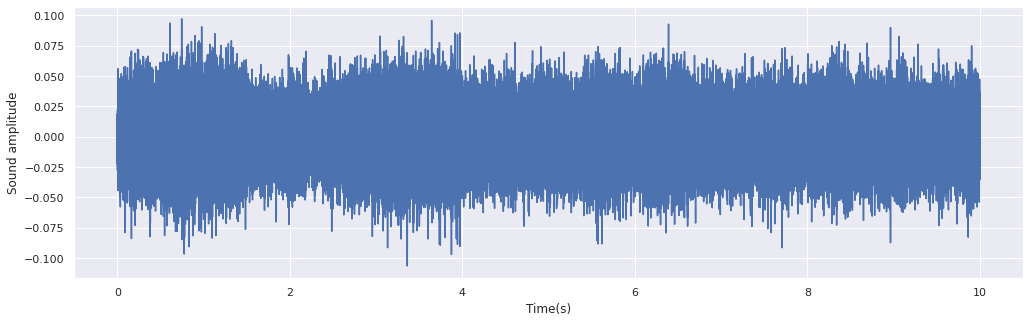

In [ ]:
# plot audio 
fig, ax = plt.subplots()
ax.plot(times, audio)
ax.set(xlabel= 'Time(s)', ylabel= 'Sound amplitude')
plt.show()

In [ ]:
## duration record
lr.get_duration(y=audio, sr=freq)

10.0

In [ ]:
# display audio
## link https://www.kaggle.com/code/hamditarek/audio-data-analysis-using-librosa/notebook
## link https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

ipd.Audio(dfOK.iloc[n,7])

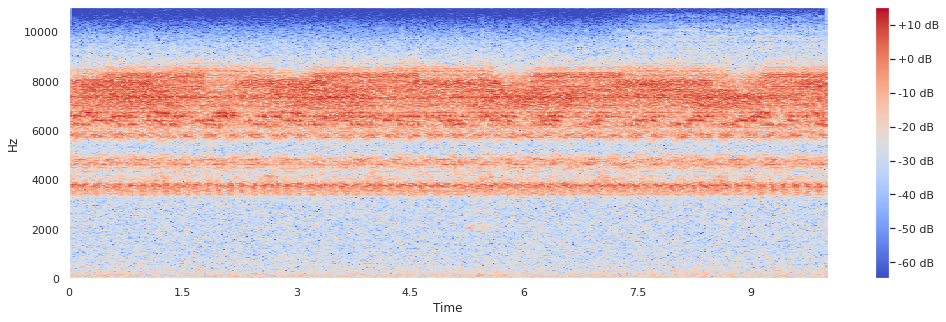

In [ ]:
## plot colormap audio
sr=freq
x= audio

fig, ax = plt.subplots() ##
X = lr.stft(x)
Xdb = lr.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
img = lr.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

### Case audio number 2, birds

In [ ]:
n = 1102

In [ ]:
dfOK.iloc[n,:]

fname                                  G100_20211128_063000.WAV
label                                                    AVEVOC
max_f                                                  2607.029
max_t                                                      10.0
min_f                                                   460.064
min_t                                                       0.0
sample_idx                                             1102.wav
path          /content/drive/MyDrive/Nube/DS4All - Cohort6 -...
audioname                                              1102.wav
Name: 1102, dtype: object

In [ ]:
## convert audio to arange in seconds
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
times = np.arange(0, len(audio))/freq

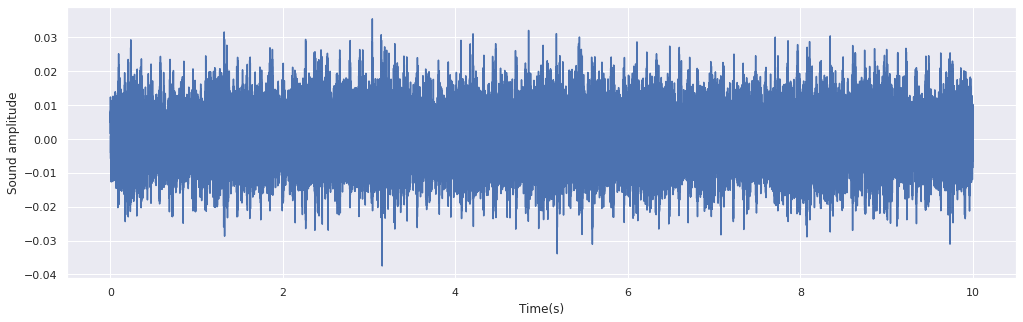

In [ ]:
# plot audio 
fig, ax = plt.subplots()
ax.plot(times, audio)
ax.set(xlabel= 'Time(s)', ylabel= 'Sound amplitude')
plt.show()

In [ ]:
## duration record
lr.get_duration(y=audio, sr=freq)

10.0

In [ ]:
# display audio
## link https://www.kaggle.com/code/hamditarek/audio-data-analysis-using-librosa/notebook
## link https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

ipd.Audio(dfOK.iloc[n,7])

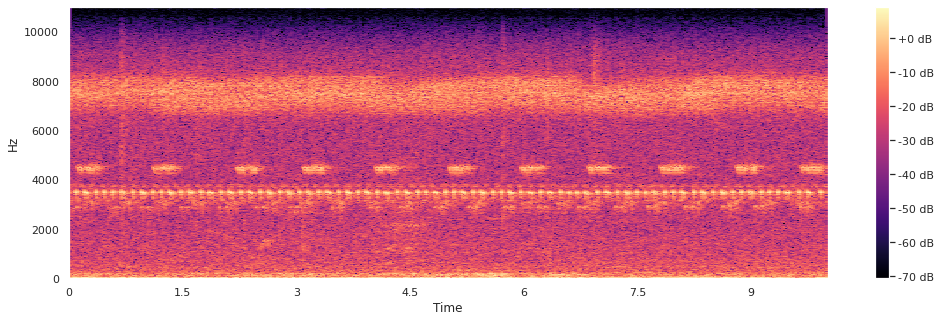

In [ ]:
## plot colormap audio
sr=freq
x= audio

fig, ax = plt.subplots() ##
X = lr.stft(x)
Xdb = lr.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
img = lr.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

### Case audio number 3, rain

In [ ]:
n = 1101

In [ ]:
dfOK.iloc[n,:]

fname                                  G100_20211121_070000.WAV
label                                                    LLUVIA
max_f                                                 49073.482
max_t                                                      10.0
min_f                                                       0.0
min_t                                                       0.0
sample_idx                                             1101.wav
path          /content/drive/MyDrive/Nube/DS4All - Cohort6 -...
audioname                                              1101.wav
Name: 1101, dtype: object

In [ ]:
## convert audio to arange in seconds
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
times = np.arange(0, len(audio))/freq

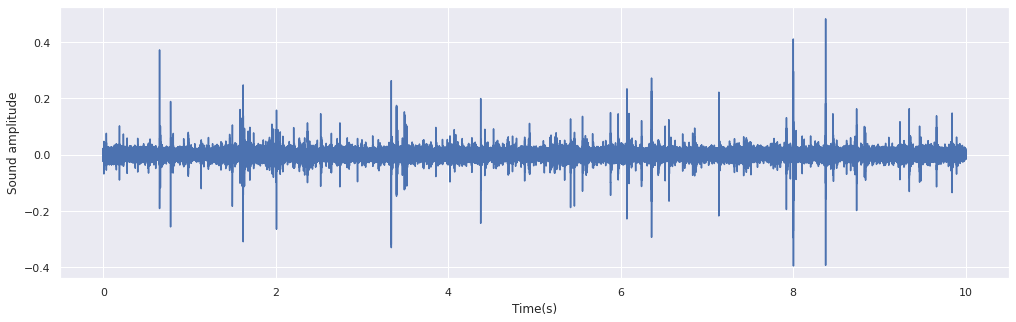

In [ ]:
# plot audio 
fig, ax = plt.subplots()
ax.plot(times, audio)
ax.set(xlabel= 'Time(s)', ylabel= 'Sound amplitude')
plt.show()

In [ ]:
## duration record
lr.get_duration(y=audio, sr=freq)

10.0

In [ ]:
# display audio
## link https://www.kaggle.com/code/hamditarek/audio-data-analysis-using-librosa/notebook
## link https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

ipd.Audio(dfOK.iloc[n,7])

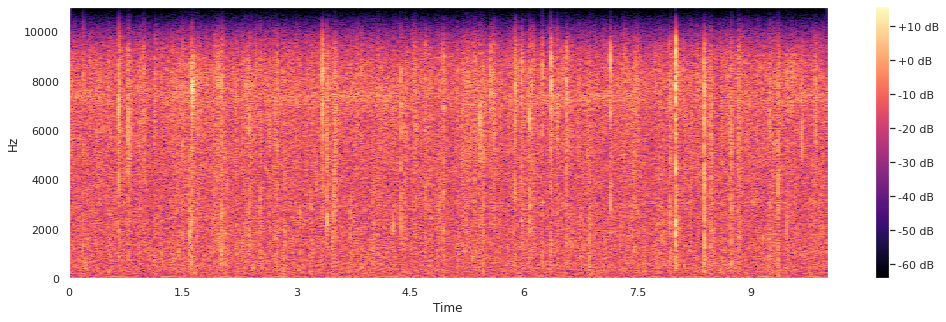

In [ ]:
## plot colormap audio
sr=freq
x= audio

fig, ax = plt.subplots() ##
X = lr.stft(x)
Xdb = lr.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
img = lr.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

### Case audio number 4, insects

In [ ]:
n = 50

In [ ]:
dfOK.iloc[n,:]

fname                                  G007_20211111_000000.WAV
label                                                    INSECT
max_f                                                  52328.66
max_t                                                       6.0
min_f                                                 2092.1843
min_t                                                       0.0
sample_idx                                             0050.wav
path          /content/drive/MyDrive/Nube/DS4All - Cohort6 -...
audioname                                              0050.wav
Name: 50, dtype: object

In [ ]:
## convert audio to arange in seconds
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
times = np.arange(0, len(audio))/freq

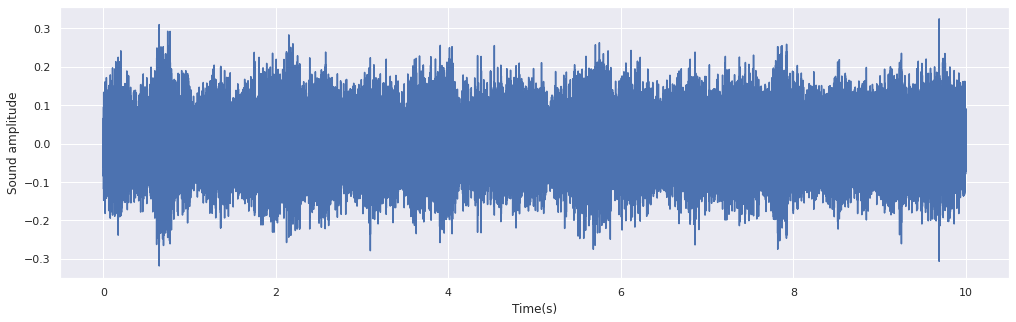

In [ ]:
# plot audio 
fig, ax = plt.subplots()
ax.plot(times, audio)
ax.set(xlabel= 'Time(s)', ylabel= 'Sound amplitude')
plt.show()

In [ ]:
## duration record
lr.get_duration(y=audio, sr=freq)

10.0

In [ ]:
# display audio
## link https://www.kaggle.com/code/hamditarek/audio-data-analysis-using-librosa/notebook
## link https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

ipd.Audio(dfOK.iloc[n,7])

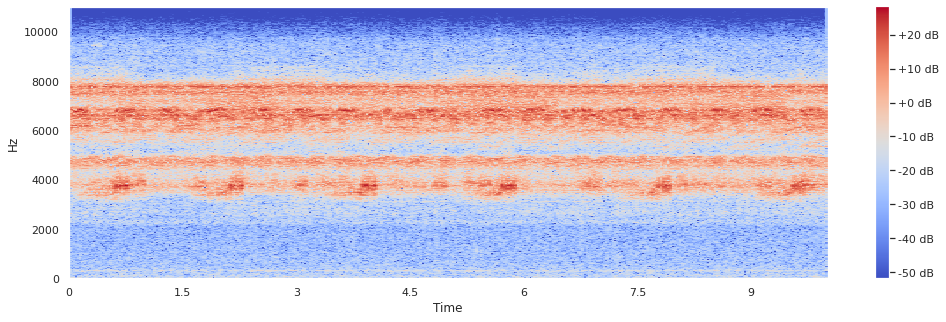

In [ ]:
## plot colormap audio
sr=freq
x= audio

fig, ax = plt.subplots() ##
X = lr.stft(x)
Xdb = lr.amplitude_to_db(abs(X))
#plt.figure(figsize=(14, 5))
img = lr.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [ ]:
## measures 
max(audio)
min(audio)
np.mean(audio)
freq

22050

In [ ]:
zero_crossings = librosa.zero_crossings(audio, pad=False)
print(sum(zero_crossings))

127409


In [ ]:
#y, sr = lr.load('./{}.wav'.format(audio))
onset_env = lr.onset.onset_strength(audio, sr=freq)
tempo = lr.beat.tempo(onset_envelope=onset_env, sr=freq)
print(tempo)

[129.19921875]


## Measures

In [ ]:
parent_dic = {
    'SENSAT':'Other',
    'MURCIE':'Biophony',
    'INSECT':'Biophony',
    'LLUVIA':'Geophony',
    'PULSOS':'Other', 
    'HERPET':'Biophony',
    'ANTROP':'Anthrophony',
    'AVEVOC':'Biophony', 
    'TRAMOT':'Anthrophony', 
    'INDETE':'Other', 
    'PASOS': 'Anthrophony',
    'FLUAGU':'Geophony',
    'ANIDOM': 'Anthrophony'
}

In [ ]:
## audio types
dfOK.label.unique()

array(['SENSAT', 'MURCIE', 'INSECT', 'LLUVIA', 'PULSOS', 'HERPET',
       'ANTROP', 'AVEVOC', 'TRAMOT', 'INDETE', 'PASOS', 'FLUAGU',
       'ANIDOM'], dtype=object)

In [ ]:
## create column type 
dfOK["Type"] = dfOK["label"].apply(lambda x: parent_dic[x])

In [ ]:
dfOK.head(2)

fname   label      max_f  max_t      min_f  min_t  \
0  G001_20211112_030000.WAV  SENSAT  47297.562    5.0  47297.562    0.0   
1  G001_20211112_180000.WAV  MURCIE  44956.098    5.0  24819.512    0.0   

  sample_idx                                               path audioname  \
0   0000.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0000.wav   
1   0001.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0001.wav   

       Type  
0     Other  
1  Biophony

In [ ]:
Nlabels = {'SENSAT':'Saturated',
'MURCIE':'Bats',
'INSECT':'Insects',
'LLUVIA':'Rain',
'PULSOS':'Pulses', 
'HERPET':'Amphibian',
'ANTROP':'Anthrophony',
'AVEVOC':'Birds', 
'TRAMOT':'Motors',#'Transporte Motorizado', 
'INDETE':'Undetermined', 
'PASOS': 'Footsteps', #'Pasos', 
'FLUAGU':'Rainfall',
'ANIDOM': 'Domestic Animals' #'Animales Domésticos'
  }

In [ ]:
dfOK['label_english'] = dfOK['label'].apply(lambda x: Nlabels[x])

In [ ]:
dfOK.head()

fname   label      max_f  max_t      min_f  min_t  \
0  G001_20211112_030000.WAV  SENSAT  47297.562    5.0  47297.562    0.0   
1  G001_20211112_180000.WAV  MURCIE  44956.098    5.0  24819.512    0.0   
2  G001_20211112_183000.WAV  INSECT  51980.490    5.0   3721.417    0.0   
3  G001_20211112_203000.WAV  MURCIE  33482.926    5.0  16776.250    0.0   
4  G001_20211112_220000.WAV  SENSAT  24585.365    5.0  24585.365    0.0   

  sample_idx                                               path audioname  \
0   0000.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0000.wav   
1   0001.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0001.wav   
2   0002.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0002.wav   
3   0003.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0003.wav   
4   0004.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0004.wav   

       Type label_english  
0     Other     Saturated  
1  Biophony          Bats  
2  Biophony       Insects  
3  Biophony          Bats  
4     Other     Saturated

### Zero crossing

In [ ]:
## Example with audio 7
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
times = np.arange(0, len(audio))/freq
zero_crossings = librosa.zero_crossings(audio, pad=False)
print(sum(zero_crossings))

127409


## RMS

In [ ]:
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
audio

array([-0.0144043 , -0.08547974,  0.03677368, ...,  0.01300049,
       -0.06671143,  0.00674438], dtype=float32)

In [ ]:
rms1 = lr.feature.rms(y=audio)
rms1.shape

(1, 431)

In [ ]:
S = librosa.magphase(librosa.stft(audio, window=np.ones, center=False))[0]
#librosa.feature.rms(S=S)

[Text(0.5, 1.0, 'log Power spectrogram')]

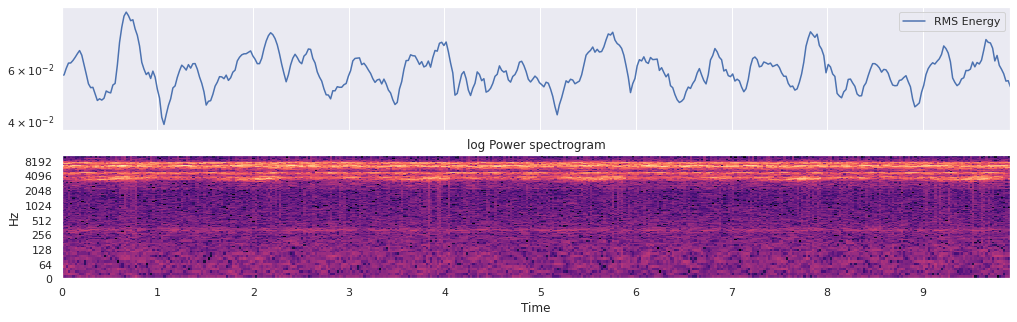

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms1)
ax[0].semilogy(times, rms1[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [ ]:
rms1.shape

(1, 431)

In [ ]:
np.mean(rms1.flatten())

0.05901185

In [ ]:
np.std(rms1.flatten())

0.008471233

# Spectral centroid

In [ ]:
audio, freq = lr.load(dfOK.iloc[n,7]) # row 7 is the path
#y, sr = librosa.load(librosa.ex('trumpet'))
cent = librosa.feature.spectral_centroid(y=audio, sr=freq)
S, phase = librosa.magphase(librosa.stft(y=audio))
#cent

[Text(0.5, 1.0, 'log Power spectrogram')]

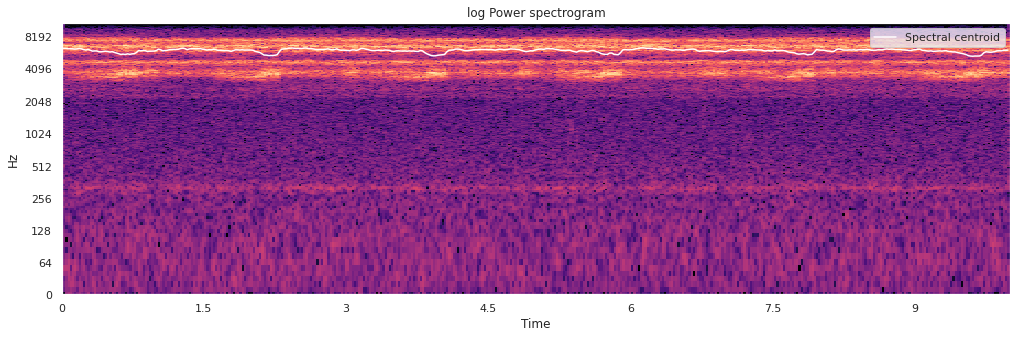

In [ ]:
times = librosa.times_like(cent)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, cent.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

In [ ]:
cent.shape

(1, 431)

In [ ]:
np.mean(cent.flatten())

6034.030331575485

In [ ]:
np.std(cent.flatten())

224.80273023785298

### Bandwidth

In [ ]:
y, sr = librosa.load(dfOK.iloc[n,7])
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spec_bw.shape

(1, 431)

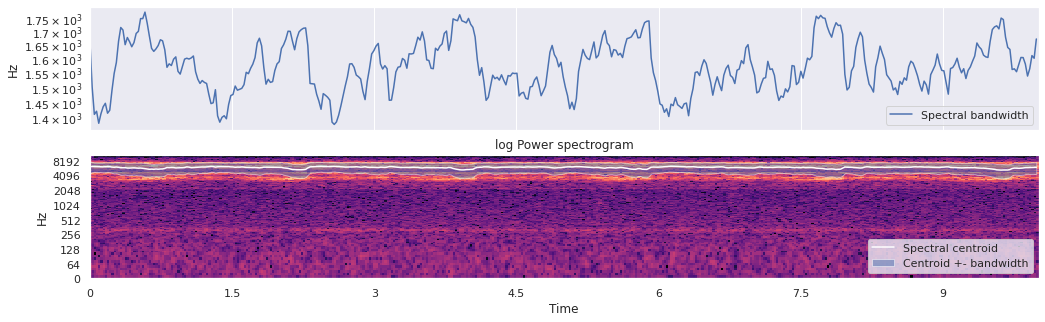

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(spec_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                np.minimum(centroid[0] + spec_bw[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

### rolloff

In [ ]:
y, sr = librosa.load(dfOK.iloc[n,7])
# Approximate maximum frequencies with roll_percent=0.85 (default)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)
print(rolloff.shape)
print(rolloff_min.shape)

(1, 431)
(1, 431)


[Text(0.5, 1.0, 'log Power spectrogram')]

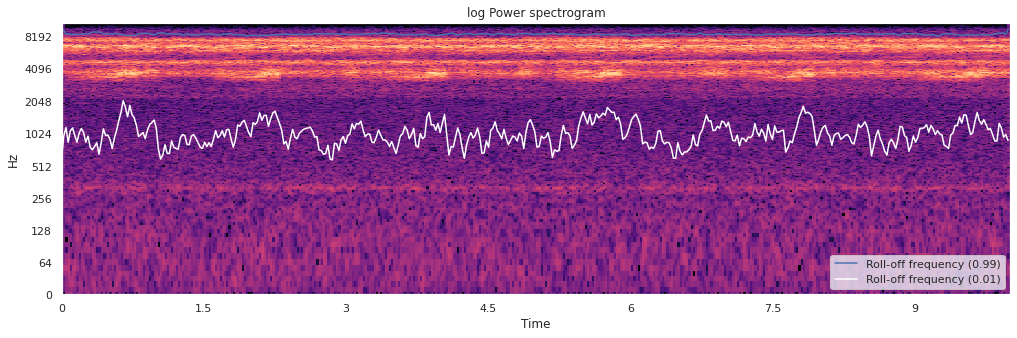

In [ ]:
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(rolloff), rolloff[0], label='Roll-off frequency (0.99)')
ax.plot(librosa.times_like(rolloff), rolloff_min[0], color='w',
        label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')

### flatness

In [ ]:
y, sr = librosa.load(dfOK.iloc[n,7])
flatness = librosa.feature.spectral_flatness(y=y)
flatness.shape

(1, 431)

[Text(0.5, 1.0, 'log Power spectrogram')]

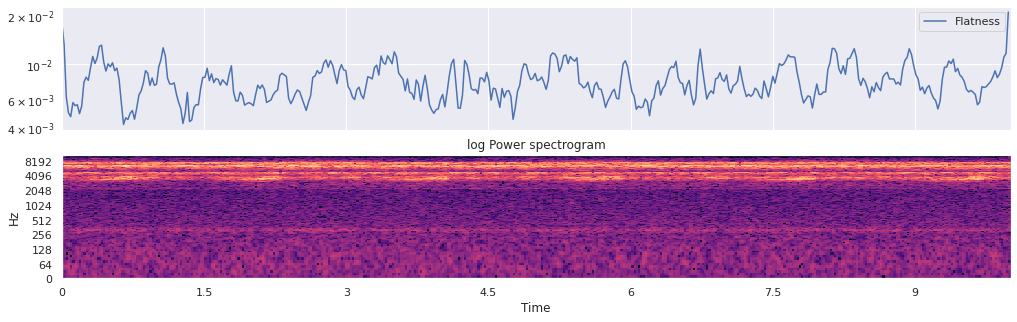

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(flatness)
ax[0].semilogy(times, flatness[0], label='Flatness')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

## spectral contrast

In [ ]:
y, sr = librosa.load(dfOK.iloc[n,7])
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)
contrast.shape

(7, 431)

[Text(0, 0.5, 'Frequency bands'), Text(0.5, 1.0, 'Spectral contrast')]

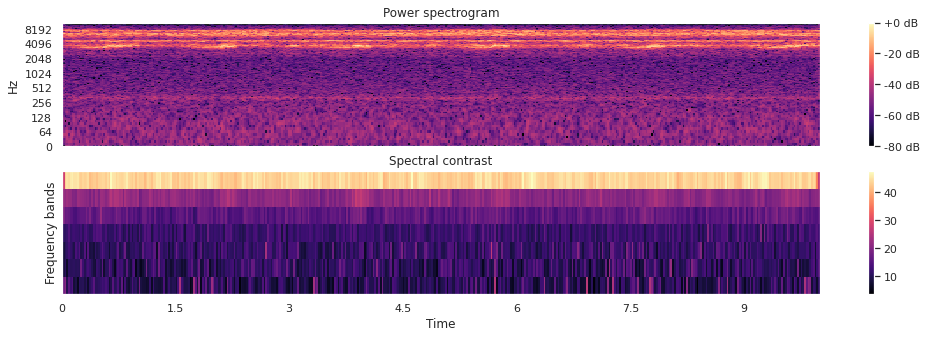

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')

# General procedure (audios)

Get zerocrossing, mean and standard deviation

In [ ]:
CZ = []
Ampli = []
Max = []
Min = []
ssd = []
med = []

medrms = []
stdrms = []

medcen = []
stdcen = []

medbw = []
stdbw = []

medrllf = []
stdrllf = []

medflt = []
stdflt = []

medcnt = []
stdcnt = []


for i in range(len(audio_files)):
#for i in range(3):

  # read audio
  audio, freq = lr.load(dfOK.iloc[i,7])
  #time = np.arange(0, len(audio))/freq
  ## Zero-crossin
  CZ.append(sum(librosa.zero_crossings(audio, pad=False)))
  
  ## amplitude measure
  Ampli.append(max(audio) - min(audio))
  ssd.append(np.std(audio))
  med.append(np.mean(audio))

  ## measure rms
  rms1 = lr.feature.rms(y=audio)
  medrms.append(np.mean(rms1.flatten()))
  stdrms.append(np.std(rms1.flatten()))

  ## measure cen
  cent = librosa.feature.spectral_centroid(y=audio, sr=freq)
  medcen.append(np.mean(cent.flatten()))
  stdcen.append(np.std(cent.flatten()))

  ## bandwidth
  spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=freq)
  medbw.append(np.mean(spec_bw.flatten()))
  stdbw.append(np.std(spec_bw.flatten()))
  
  ## rolloff
  rolloff = librosa.feature.spectral_rolloff(y=audio, sr=freq)
  medrllf.append(np.mean(rolloff.flatten()))
  stdrllf.append(np.std(rolloff.flatten()))

  ## flatness
  flatness = librosa.feature.spectral_flatness(y=audio)
  medflt.append(np.mean(flatness.flatten()))
  stdflt.append(np.std(flatness.flatten()))

  ## spectral contrast
  S = np.abs(librosa.stft(audio))
  contrast = librosa.feature.spectral_contrast(S=S, sr=freq)
  medcnt.append(np.mean(contrast.flatten()))
  stdcnt.append(np.std(contrast.flatten()))



In [ ]:
#ssd

In [ ]:
zipped = list(zip(CZ, Ampli, ssd, med, medrms, stdrms, medcen, stdcen, medbw, stdbw, medrllf, stdrllf, medflt, stdflt, medcnt, stdcnt))

#zipped = list(zip(Maxi, Mini, Med))
#df = pd.DataFrame(zipped, columns=['Max', 'Min', 'Med'])
df = pd.DataFrame(zipped, columns=['CrossZeros', 'Amplitude', 'std', 'mean', 'mean-rms', 'std-rms',
                                   'mean-centroid', 'std-centroid', 'mean-bandwidth', 'std-bandwidth',
                                   'mean-rolloff', 'std-rolloff', 'mean-flatness', 'std-flatness',
                                   'mean-contrast', 'std-contrast'
                                   ])
df.head(5)

CrossZeros  Amplitude       std      mean  mean-rms   std-rms  \
0      136745   0.220459  0.017280 -0.000001  0.017255  0.000933   
1      158090   0.812286  0.082252 -0.000003  0.081965  0.006985   
2      147240   0.419525  0.044962 -0.000003  0.044786  0.003987   
3      136383   0.203735  0.019523 -0.000002  0.019400  0.002173   
4      136655   0.271423  0.022955 -0.000002  0.022445  0.004839   

   mean-centroid  std-centroid  mean-bandwidth  std-bandwidth  mean-rolloff  \
0    6028.163264    193.266234     2461.274321     106.016850    7593.30188   
1    7450.933512     59.000862     1347.324443      66.478986    7593.30188   
2    6823.210029     91.661953     1771.184186      92.167954    7593.30188   
3    6357.186938    129.709915     1841.758661      68.720301    7593.30188   
4    6564.259307    242.878755     1964.955974     118.791294    7593.30188   

   std-rolloff  mean-flatness  std-flatness  mean-contrast  std-contrast  
0    93.510596       0.141406      0.033596      15.181476      7.385015  
1    93.510596       0.001628      0.000702      18.347819     11.506907  
2    93.510596       0.017159      0.005115      18.279182      8.744193  
3    93.510596       0.017915      0.004321      17.611359     10.477387  
4    93.510596       0.041083      0.017345      16.618390      8.415414

In [ ]:
df.describe()

CrossZeros    Amplitude          std          mean     mean-rms  \
count    1104.000000  1104.000000  1104.000000  1.104000e+03  1104.000000   
mean   116196.634058     0.617872     0.039917  3.879337e-07     0.038492   
std     28019.167994     0.563486     0.037022  1.910464e-05     0.035912   
min      6017.000000     0.015930     0.001653 -1.088127e-04     0.001636   
25%     99760.500000     0.210617     0.015651 -2.554930e-06     0.015175   
50%    120775.000000     0.430878     0.031116 -6.614910e-07     0.029672   
75%    136488.750000     0.778938     0.051659  9.553870e-07     0.050185   
max    171641.000000     1.999939     0.301038  4.226916e-04     0.298737   

           std-rms  mean-centroid  std-centroid  mean-bandwidth  \
count  1104.000000    1104.000000   1104.000000     1104.000000   
mean      0.008062    5622.702934    260.440543     2263.734619   
std       0.011293     987.248913    173.247115      454.847974   
min       0.000084    1141.723879     33.904421     1113.541748   
25%       0.002314    4924.859046    151.282991     1883.114133   
50%       0.004858    5778.005590    215.431057     2277.851586   
75%       0.009396    6315.971023    309.931379     2656.430453   
max       0.190572    8132.439350   1495.392839     3486.781322   

       std-bandwidth  mean-rolloff  std-rolloff  mean-flatness  std-flatness  \
count    1104.000000  1.104000e+03  1104.000000    1104.000000   1104.000000   
mean      122.779076  7.593302e+03    93.510596       0.060160      0.014816   
std        72.458364  9.099069e-13     0.000000       0.068186      0.015091   
min        25.708043  7.593302e+03    93.510596       0.001007      0.000256   
25%        75.171472  7.593302e+03    93.510596       0.013089      0.004611   
50%       103.483074  7.593302e+03    93.510596       0.028573      0.009444   
75%       151.325287  7.593302e+03    93.510596       0.080313      0.020121   
max       652.691125  7.593302e+03    93.510596       0.300780      0.113990   

       mean-contrast  std-contrast  
count    1104.000000   1104.000000  
mean       17.958293      9.539070  
std         1.341287      1.335223  
min        13.057619      5.678957  
25%        17.142719      8.358686  
50%        18.060729      9.716997  
75%        18.837751     10.620249  
max        21.895155     12.236271

In [ ]:
# merge dataframe with measures
dfT = dfOK.merge(df, left_index=True, right_index=True)
#dfT = dfOK.merge(df)
dfT.head(2)

fname   label      max_f  max_t      min_f  min_t  \
0  G001_20211112_030000.WAV  SENSAT  47297.562    5.0  47297.562    0.0   
1  G001_20211112_180000.WAV  MURCIE  44956.098    5.0  24819.512    0.0   

  sample_idx                                               path audioname  \
0   0000.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0000.wav   
1   0001.wav  /content/drive/MyDrive/Nube/DS4All - Cohort6 -...  0001.wav   

       Type  ... mean-centroid  std-centroid  mean-bandwidth  std-bandwidth  \
0     Other  ...   6028.163264    193.266234     2461.274321     106.016850   
1  Biophony  ...   7450.933512     59.000862     1347.324443      66.478986   

   mean-rolloff  std-rolloff  mean-flatness  std-flatness  mean-contrast  \
0    7593.30188    93.510596       0.141406      0.033596      15.181476   
1    7593.30188    93.510596       0.001628      0.000702      18.347819   

   std-contrast  
0      7.385015  
1     11.506907  

[2 rows x 27 columns]

# CrossZeros vs Types

In [ ]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Amplitude vs type')

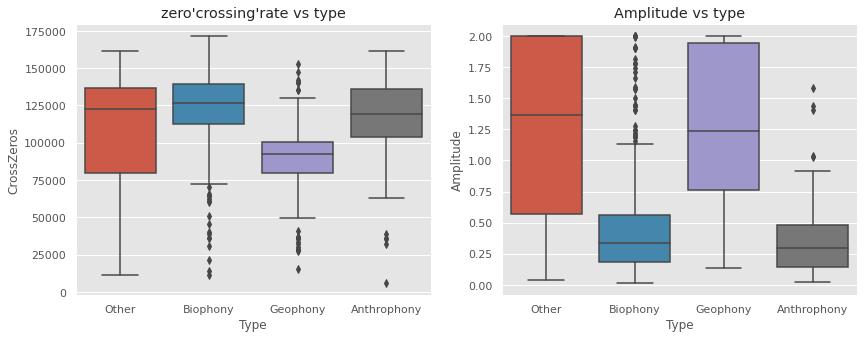

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'CrossZeros', data = dfT, showfliers=True, ax = ax1) #showfliers=False for nice display
ax1.set_title("zero'crossing'rate vs type")
sns.boxplot(x='Type', y = 'Amplitude', data = dfT, showfliers=True, ax = ax2) #showfliers=False for nice display
ax2.set_title("Amplitude vs type")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


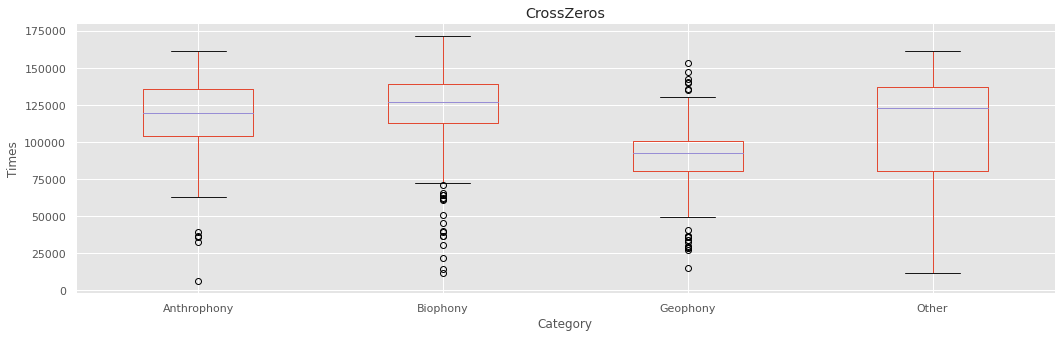

In [ ]:
dfT.boxplot(column = 'CrossZeros', by = 'Type')
plt.xlabel('Category')
plt.ylabel('Times')
plt.title('CrossZeros')
plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


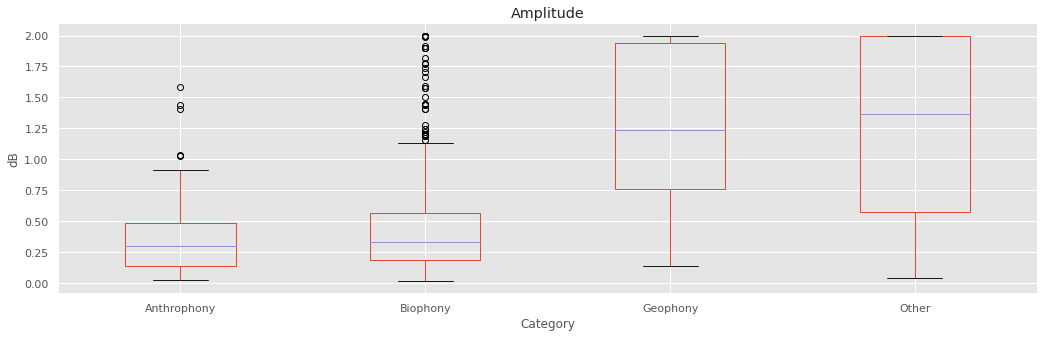

In [ ]:
dfT.boxplot(column = 'Amplitude', by = 'Type')
plt.xlabel('Category')
plt.ylabel('dB')
plt.title('Amplitude')
plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


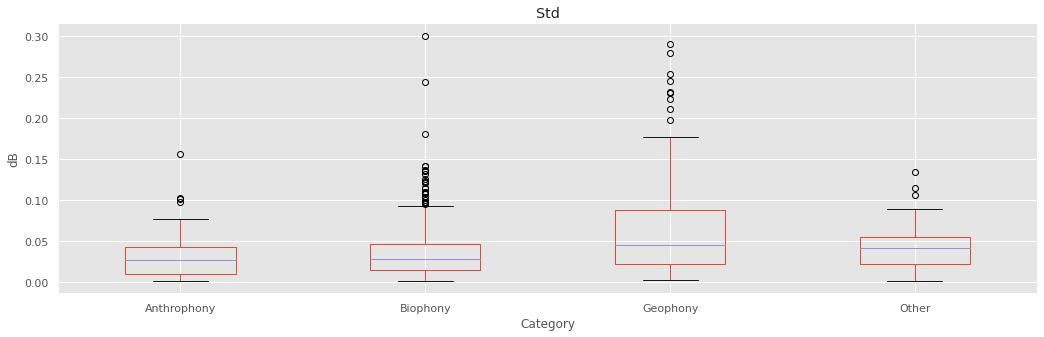

In [ ]:
dfT.boxplot(column = 'std', by = 'Type')
plt.xlabel('Category')
plt.ylabel('dB')
plt.title('Std')
plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


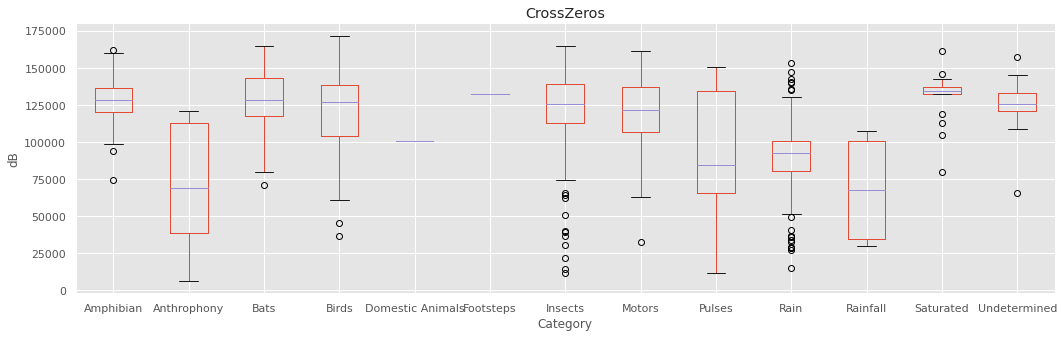

In [ ]:
dfT.boxplot(column = 'CrossZeros', by = 'label_english')
plt.xlabel('Category')
plt.ylabel('dB')
plt.title('CrossZeros')
plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


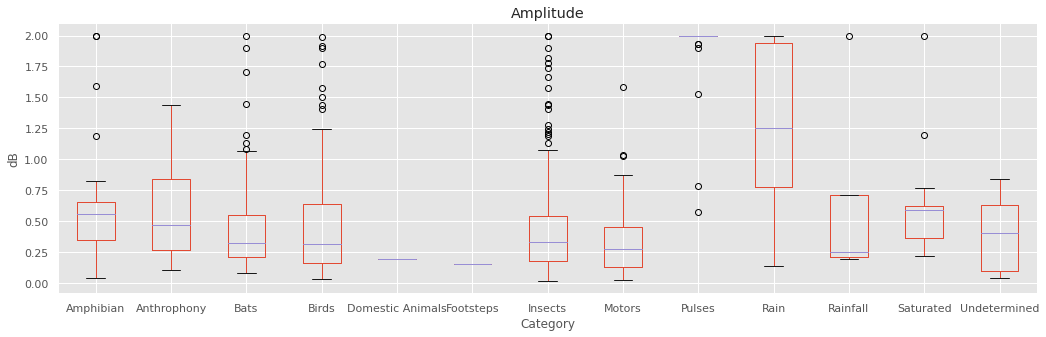

In [ ]:
dfT.boxplot(column = 'Amplitude', by = 'label_english')
plt.xlabel('Category')
plt.ylabel('dB')
plt.title('Amplitude')
plt.suptitle('')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


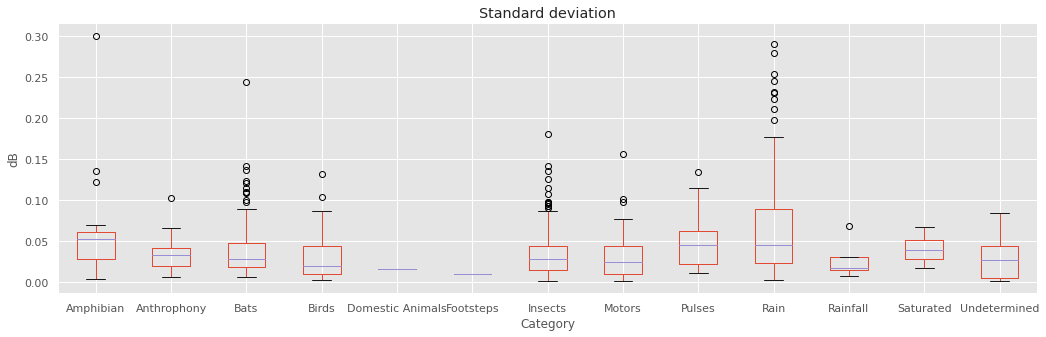

In [ ]:
dfT.boxplot(column = 'std', by = 'label_english')
plt.xlabel('Category')
plt.ylabel('dB')
plt.title('Standard deviation')
plt.suptitle('')
plt.show()

# RMS vs Types

Text(0.5, 1.0, 'std-centroid vs type')

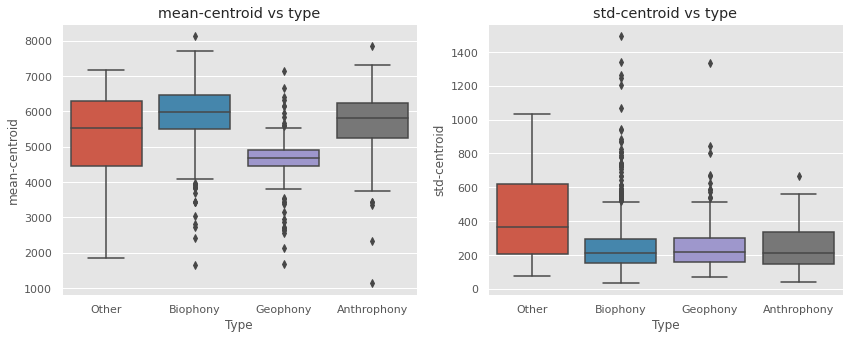

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'mean-centroid', data = dfT, showfliers=True, ax = ax1) #showfliers=False for nice display
ax1.set_title("mean-centroid vs type")
sns.boxplot(x='Type', y = 'std-centroid', data = dfT, showfliers=True, ax = ax2) #showfliers=False for nice display
ax2.set_title("std-centroid vs type")

# Spectral centroid vs types

Text(0.5, 1.0, 'Standard deviation RMS vs type')

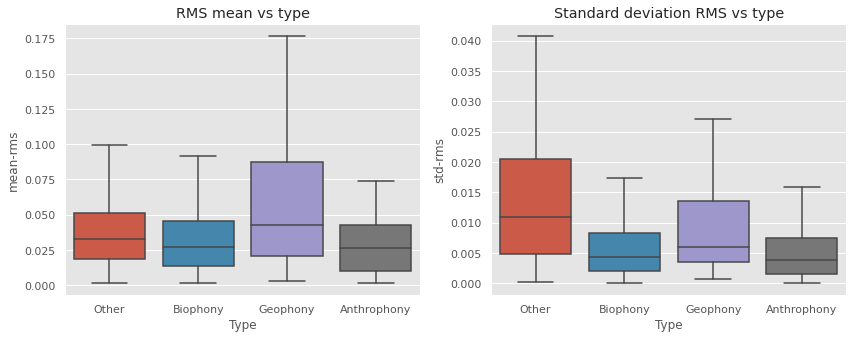

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'mean-rms', data = dfT, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("RMS mean vs type")
sns.boxplot(x='Type', y = 'std-rms', data = dfT, showfliers=False, ax = ax2) #showfliers=False for nice display
ax2.set_title("Standard deviation RMS vs type")

## bandwidth vs types

Text(0.5, 1.0, 'Standard deviation RMS vs type')

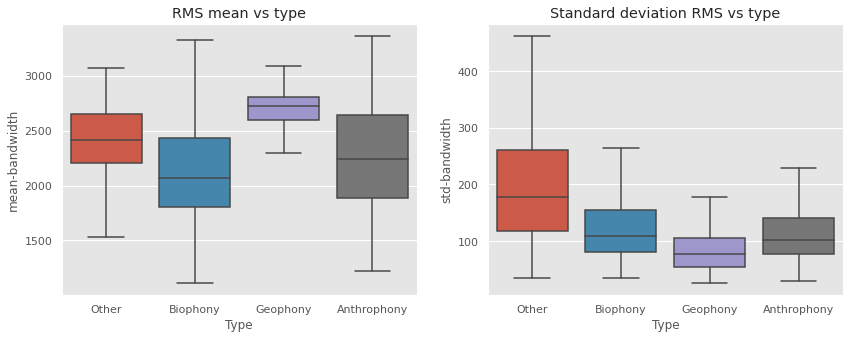

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'mean-bandwidth', data = dfT, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("RMS mean vs type")
sns.boxplot(x='Type', y = 'std-bandwidth', data = dfT, showfliers=False, ax = ax2) #showfliers=False for nice display
ax2.set_title("Standard deviation RMS vs type")

## rolloff vs types

Text(0.5, 1.0, 'Standard deviation RMS vs type')

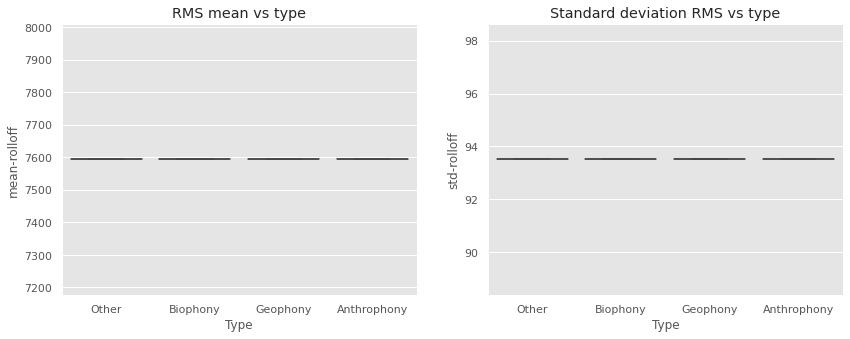

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'mean-rolloff', data = dfT, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("RMS mean vs type")
sns.boxplot(x='Type', y = 'std-rolloff', data = dfT, showfliers=False, ax = ax2) #showfliers=False for nice display
ax2.set_title("Standard deviation RMS vs type")

## flatness vs types

Text(0.5, 1.0, 'Standard deviation RMS vs type')

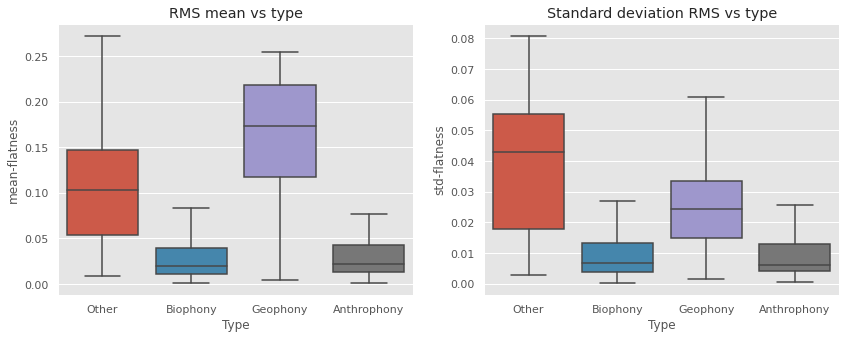

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'mean-flatness', data = dfT, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("RMS mean vs type")
sns.boxplot(x='Type', y = 'std-flatness', data = dfT, showfliers=False, ax = ax2) #showfliers=False for nice display
ax2.set_title("Standard deviation RMS vs type")

## Spectral contrast vs types

Text(0.5, 1.0, 'Standard deviation RMS vs type')

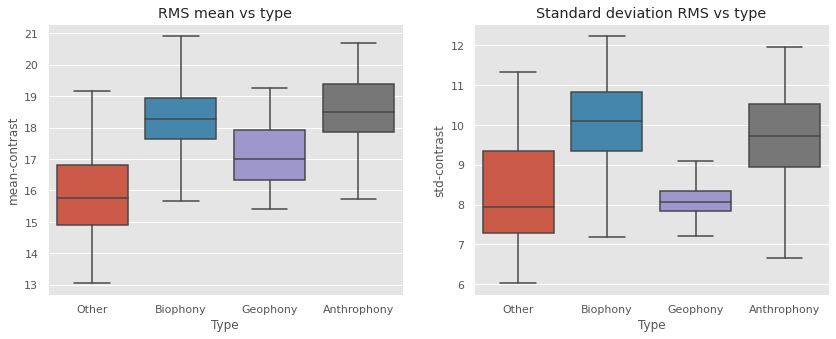

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (14,5), ncols=2, sharey= False)
sns.boxplot(x='Type', y = 'mean-contrast', data = dfT, showfliers=False, ax = ax1) #showfliers=False for nice display
ax1.set_title("RMS mean vs type")
sns.boxplot(x='Type', y = 'std-contrast', data = dfT, showfliers=False, ax = ax2) #showfliers=False for nice display
ax2.set_title("Standard deviation RMS vs type")

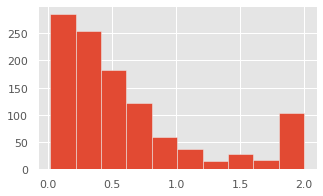

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dfT.Amplitude)
 
# Show plot
plt.show()

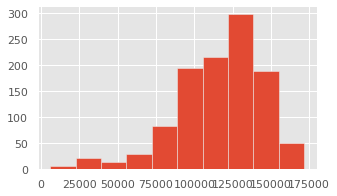

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dfT.CrossZeros)
 
# Show plot
plt.show()

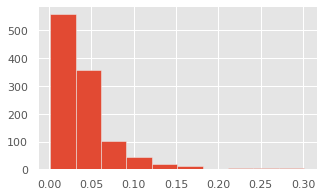

In [ ]:
# Creating histogram
fig, ax = plt.subplots(figsize =(5, 3))
ax.hist(dfT['std'])
 
# Show plot
plt.show()

In [ ]:
#profile = ProfileReport(df)
#profile

# Correlación entre datos

In [ ]:
dfT.corr()

max_f     max_t     min_f     min_t  CrossZeros  Amplitude  \
max_f          1.000000 -0.531873  0.292081 -0.177199   -0.134396   0.269403   
max_t         -0.531873  1.000000 -0.297237  0.242899    0.170143  -0.322750   
min_f          0.292081 -0.297237  1.000000 -0.063477    0.103800   0.014184   
min_t         -0.177199  0.242899 -0.063477  1.000000    0.050828  -0.156679   
CrossZeros    -0.134396  0.170143  0.103800  0.050828    1.000000  -0.343774   
Amplitude      0.269403 -0.322750  0.014184 -0.156679   -0.343774   1.000000   
std            0.177182 -0.241152  0.021962 -0.101875   -0.120394   0.675756   
mean           0.068106  0.006804 -0.016916 -0.026173   -0.066955   0.015512   
mean-rms       0.177395 -0.229928  0.023629 -0.097476   -0.099567   0.649189   
std-rms        0.100164 -0.231925 -0.006739 -0.094195   -0.245484   0.589834   
mean-centroid -0.144499  0.158809  0.102621  0.057798    0.954553  -0.320496   
std-centroid  -0.004331 -0.112943 -0.023617 -0.040396   -0.202127   0.195567   

                    std      mean  mean-rms   std-rms  mean-centroid  \
max_f          0.177182  0.068106  0.177395  0.100164      -0.144499   
max_t         -0.241152  0.006804 -0.229928 -0.231925       0.158809   
min_f          0.021962 -0.016916  0.023629 -0.006739       0.102621   
min_t         -0.101875 -0.026173 -0.097476 -0.094195       0.057798   
CrossZeros    -0.120394 -0.066955 -0.099567 -0.245484       0.954553   
Amplitude      0.675756  0.015512  0.649189  0.589834      -0.320496   
std            1.000000  0.042651  0.994862  0.611866      -0.045820   
mean           0.042651  1.000000  0.041590  0.025325      -0.073453   
mean-rms       0.994862  0.041590  1.000000  0.532889      -0.023450   
std-rms        0.611866  0.025325  0.532889  1.000000      -0.204849   
mean-centroid -0.045820 -0.073453 -0.023450 -0.204849       1.000000   
std-centroid  -0.053603 -0.031578 -0.109118  0.413216      -0.220734   

               std-centroid  
max_f             -0.004331  
max_t             -0.112943  
min_f             -0.023617  
min_t             -0.040396  
CrossZeros        -0.202127  
Amplitude          0.195567  
std               -0.053603  
mean              -0.031578  
mean-rms          -0.109118  
std-rms            0.413216  
mean-centroid     -0.220734  
std-centroid       1.000000

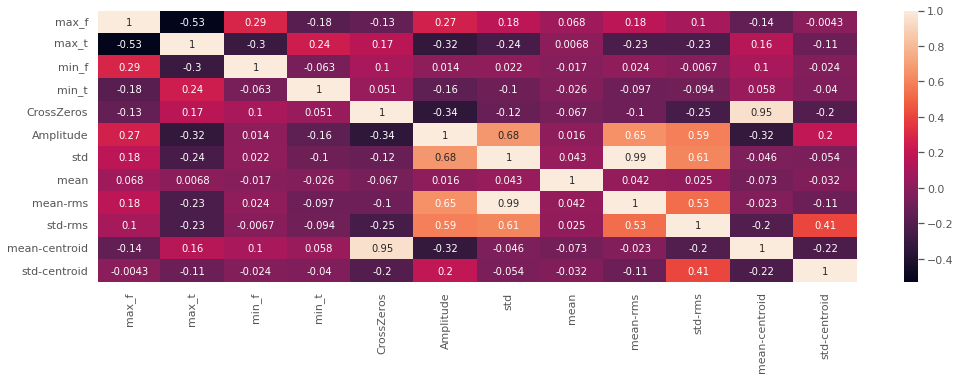

In [ ]:
#ploting the heatmap for correlation
ax = sns.heatmap(dfT.corr(), annot=True)